In [1]:
import pyaerocom as pya
import os
pya.change_verbosity('critical')

2018-09-28 12:48:45,014:WARNING:
basemap extension library is not installed (or cannot be imported. Some features will not be available
2018-09-28 12:48:45,734:WARNING:
geopy library is not available. Aeolus data read not enabled


## Comparison of multiple variables based on model suite and observations

This notebook is based on netCDF files that contain data that has been colocated. The colocated data files can be created using the [ANALYSIS_SCRIPT.py](https://github.com/metno/pyaerocom-synthesis/blob/master/ANALYSIS_SCRIPT.py) file which is part of this repository. 

An overview of the available parameters, models and the corresponding obsnetworks used for the intercomparison study is provided below. 

### Setup paths and notebook options

#### Directory for colocated data files

In [2]:
DATA_DIR = 'output/colocated_data'

# check if read is ok
if not os.access(DATA_DIR, os.R_OK):
    raise IOError('Cannot access data')

#### Comment on colocated data files

The directory containing colocated data files (*DATA_DIR*) contains sub-directories for each model available. The colocated data files are named using the following convention:

*<var_name>_REF-<obsnetwork_id>_MOD-<model_id>_<ts_type_source>_<start_date>_<stop_date>_<ts_type>_<filter_name>_COLL.nc*

For instance:

*abs550aer_REF-AeronetInvV3Lev2.daily_MOD-INCA-BCext_CTRL2016-PD-3hourly_20100101_20101231_monthly_WORLD-noMOUNTAINS_COLL.nc*

#### Output directory

In [3]:
OUTPUT_DIR = 'output_notebooks/'

WRITE_OK = True
if not os.access(OUTPUT_DIR, os.W_OK):
    print('No write access to output directory, no files will be saved')
    WRITE_OK = False

#### Output files

In [4]:
RESULT_TABLE = OUTPUT_DIR + 'multi_comp_table.csv'

#### Options

In [5]:
# If False and RESULT_TABLE exists, then the results are simply read from the table CSV file and not reloaded from the
# colocated data .nc files (faster)
RELOAD_RESULTS = True

# It True, all heatmaps created below are saved as png in the above specified output directory
SAVE_HEATMAPS = True

### Import results 

First, check if results table exists and if not make sure results are reloaded. Then read results using reading class *ReadColocatedData*.

In [6]:
if not os.path.exists(RESULT_TABLE):
    RELOAD_RESULTS = True    

In [7]:
from helpers.io import ReadColocatedData
reader = ReadColocatedData(DATA_DIR)

if RELOAD_RESULTS:
    table = reader.compute_statistics_table()
    table.to_csv(RESULT_TABLE)
else:
    table = reader.read_statistics_table_csv(RESULT_TABLE)
table #note that this table is also stored in reader.stats_table

Freq  \
Model                          Year Variable    Obs                               
CAM5.3-Oslo_AP3-CTRL2016-PD    2010 abs550aer   AeronetInvV3Lev2.daily  monthly   
                                                AeronetInvV3Lev2.daily   yearly   
                                    ang4487aer  AeronetSunV3Lev2.daily   yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                    ec550aer    EBASMC                   yearly   
                                                EBASMC                  monthly   
                                    od550aer    AeronetSunV3Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily   yearly   
                                                MODIS6.aqua              yearly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                                MODIS6.terra             yearly   
                                    od550gt1aer AeronetSDAV3Lev2.daily   yearly   
                                                AeronetSDAV3Lev2.daily  monthly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily   yearly   
CNRM-AESM2Nud_AP3-CTRL2016-PD  2010 od550aer    AeronetSunV3Lev2.daily   yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.aqua              yearly   
                                                MODIS6.terra             yearly   
                                                MODIS6.terra            monthly   
                                    od550lt1aer AeronetSDAV3Lev2.daily   yearly   
                                                AeronetSDAV3Lev2.daily  monthly   
CNRM-AESM2_AP3-CTRL2016-PD     2010 od550aer    AeronetSunV3Lev2.daily   yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.aqua              yearly   
                                                MODIS6.terra             yearly   
                                                MODIS6.terra            monthly   
...                                                                         ...   
SPRINTARS-T213_AP3-CTRL2016-PD 2008 abs550aer   AeronetInvV3Lev2.daily   yearly   
                                                AeronetInvV3Lev2.daily  monthly   
                                    ang4487aer  AeronetSunV3Lev2.daily   yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                    od550aer    AeronetSunV3Lev2.daily   yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua              yearly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                                MODIS6.terra             yearly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily   yearly   
                               2010 abs550aer   AeronetInvV3Lev2.daily   yearly   
                                                AeronetInvV3Lev2.daily  monthly   
                                    ang4487aer  AeronetSunV3Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily   yearly   
        

### Analysis of monthly results

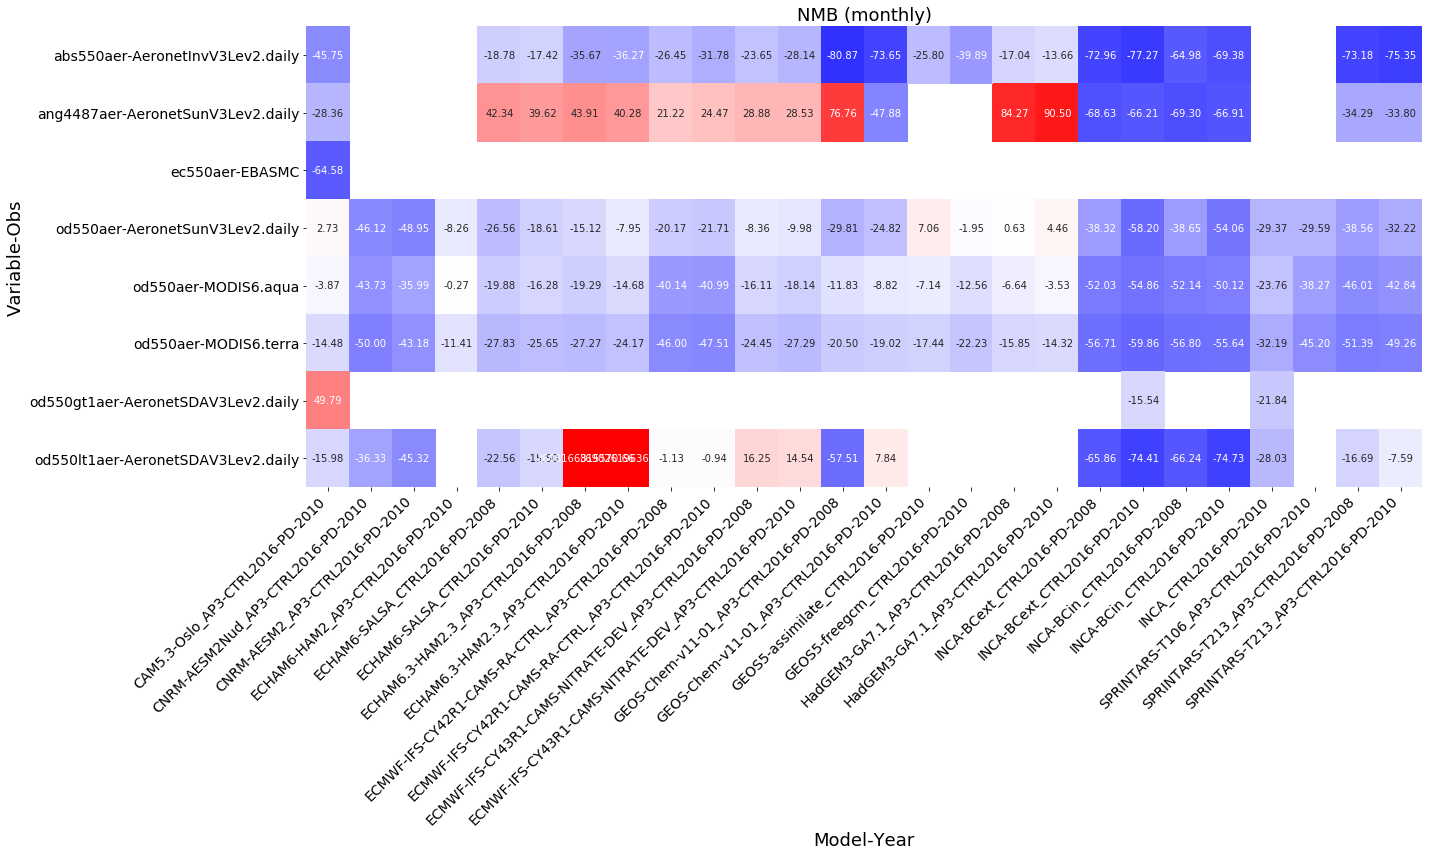

In [8]:
ax=reader.plot_heatmap(colname='NMB', ts_type='monthly', color_rowwise=False,
                       figsize=(20, 12), center=0, vmin=-100, vmax=100, output_dir=OUTPUT_DIR, savefig=SAVE_HEATMAPS)

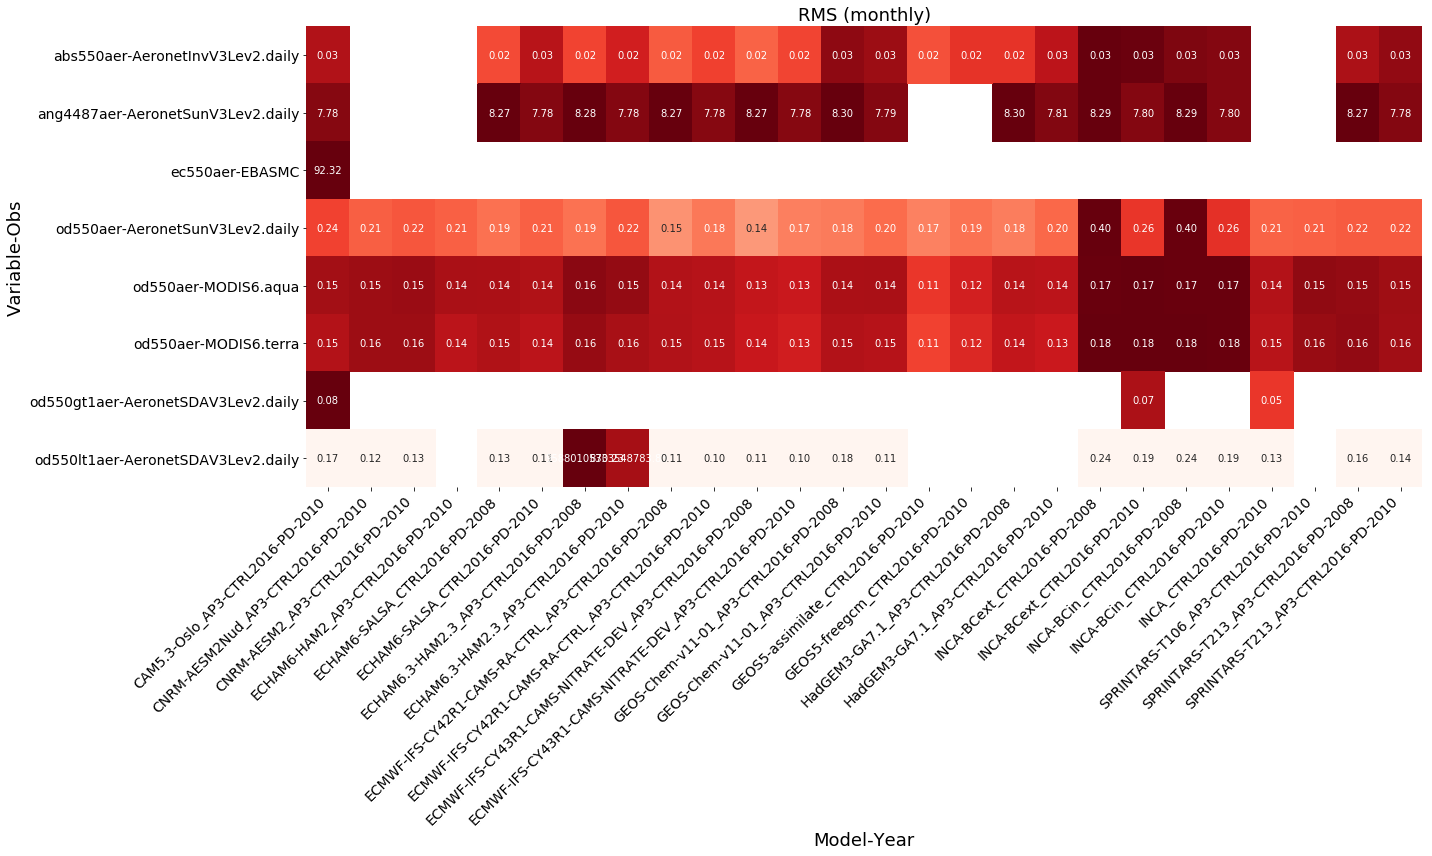

In [9]:
reader.plot_heatmap(colname='RMS', ts_type='monthly', cmap='Reds', color_rowwise=True,
                    figsize=(20, 12), output_dir=OUTPUT_DIR, savefig=SAVE_HEATMAPS)

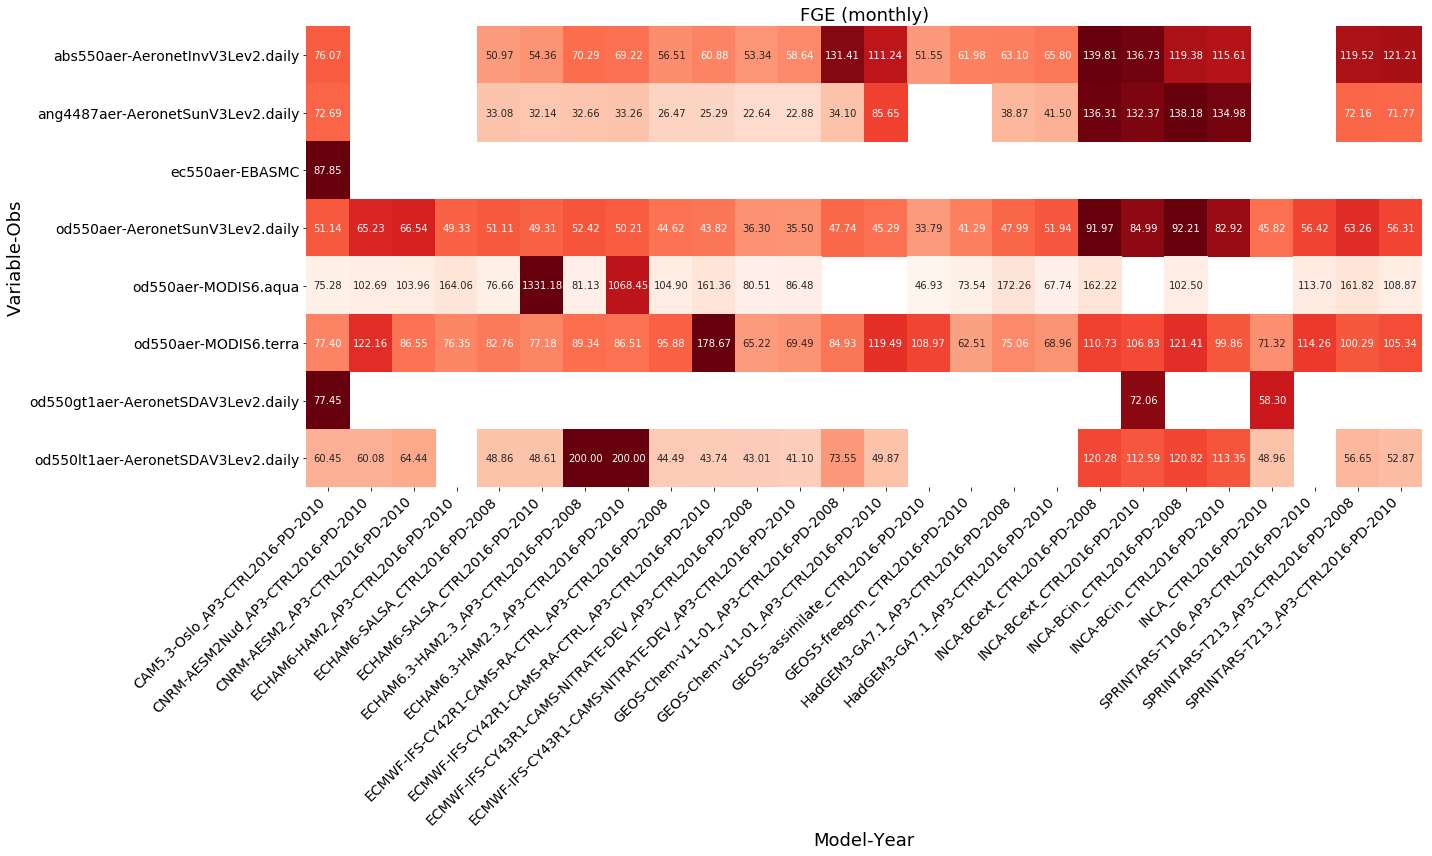

In [10]:
reader.plot_heatmap(colname='FGE', ts_type='monthly', cmap='Reds', color_rowwise=True,
                    figsize=(20, 12), output_dir=OUTPUT_DIR, savefig=SAVE_HEATMAPS)

### Analysis of yearly results

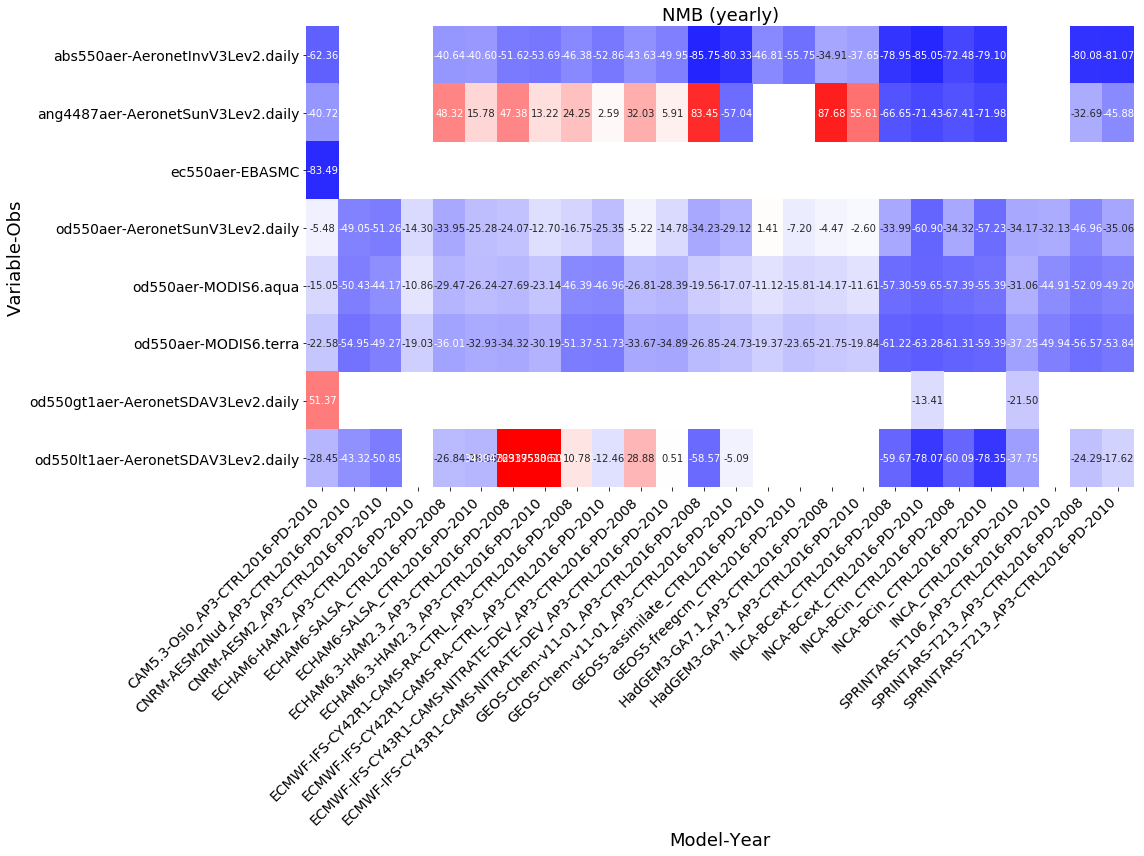

In [11]:
ax=reader.plot_heatmap(colname='NMB', ts_type='yearly', color_rowwise=False,
                       figsize=(16, 12), center=0, vmin=-100, vmax=100, output_dir=OUTPUT_DIR, savefig=SAVE_HEATMAPS)

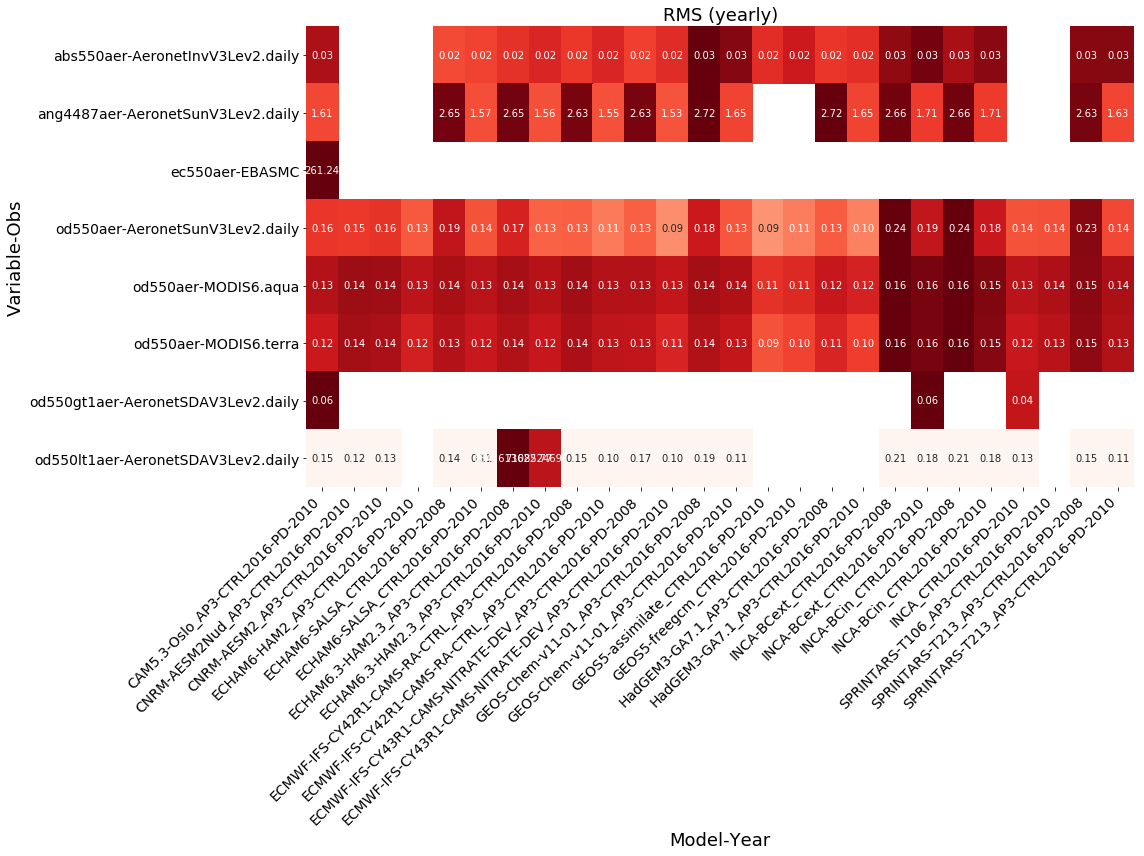

In [12]:
reader.plot_heatmap(colname='RMS', ts_type='yearly', cmap='Reds', color_rowwise=True,
                    figsize=(16, 12), output_dir=OUTPUT_DIR, savefig=SAVE_HEATMAPS)

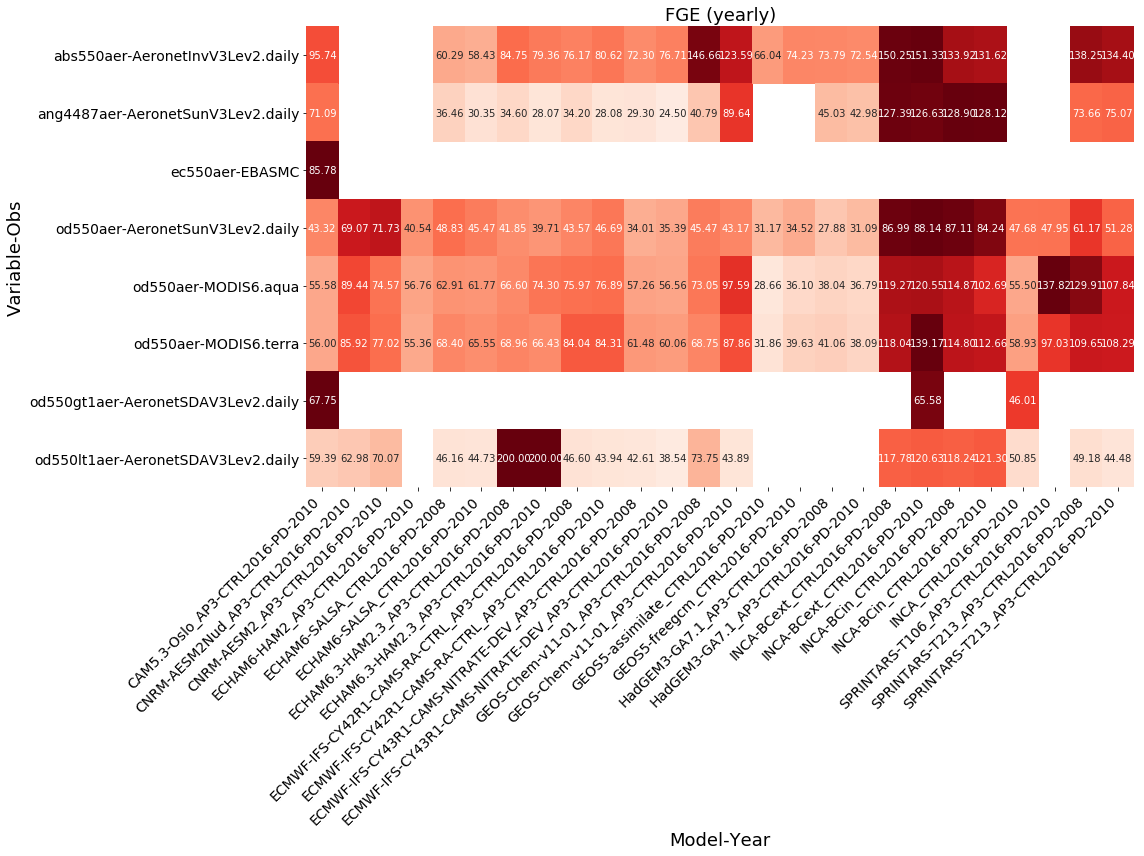

In [13]:
reader.plot_heatmap(colname='FGE', ts_type='yearly', cmap='Reds', color_rowwise=True,
                    figsize=(16, 12), output_dir=OUTPUT_DIR, savefig=SAVE_HEATMAPS)